# Exploring the Weather in Athens

### Analytics Practitcum I. - Assignment I
#### PT - MSc in Business Analytics 2021-2022, AUEB.
---
> Professor: Panos Louridas. <br />
> Alamanis Konstantinos, MSc student. <br />
> p2822103@aueb.gr

## Q1: Obtain the Data

In [1]:
#imported libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data10 = pd.read_csv("./athens.csv")
data10

FileNotFoundError: [Errno 2] No such file or directory: './athens.csv'

In [2]:
#reading 1st dataset
data = pd.read_csv("https://www.ncei.noaa.gov/orders/cdo/2911618.csv", sep=',', usecols = ['DATE','PRCP','TAVG','TMAX','TMIN'] )
data

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6
3,1955-01-04,0.0,NaN,18.8,7.3
4,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN
23247,2020-12-28,6.6,14.8,18.2,11.9
23248,2020-12-29,0.0,16.3,19.9,12.5
23249,2020-12-30,0.0,16.4,19.9,14.8


In [3]:
#data types check
data.dtypes

DATE     object
PRCP    float64
TAVG    float64
TMAX    float64
TMIN    float64
dtype: object

In [4]:
#extracting year from date
data['DATE']=data['DATE'].astype('datetime64[ns]')
data['YEAR']=pd.DatetimeIndex(data['DATE']).year
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH
0,1955-01-01,0.0,NaN,18.5,10.2,1955,1
1,1955-01-02,2.0,NaN,14.4,7.0,1955,1
2,1955-01-03,0.0,NaN,15.8,9.6,1955,1
3,1955-01-04,0.0,NaN,18.8,7.3,1955,1
4,1955-01-05,0.0,NaN,17.9,8.4,1955,1
...,...,...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN,2020,12
23247,2020-12-28,6.6,14.8,18.2,11.9,2020,12
23248,2020-12-29,0.0,16.3,19.9,12.5,2020,12
23249,2020-12-30,0.0,16.4,19.9,14.8,2020,12


In [5]:
#missing values per metric
missing_prcp = data['PRCP'].isna().sum()/len(data)
missing_tavg = data['TAVG'].isna().sum()/len(data)
print(round(missing_prcp,2)*100)
print(round(missing_tavg,2)*100)

2.0
10.0


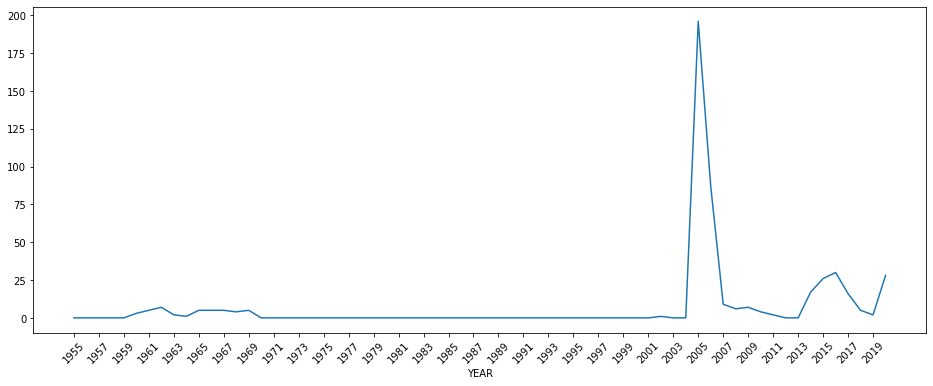

In [6]:
#visualise precipitation nulls across years
fig1, ax = plt.subplots(figsize = (16,6))  
fig1 = data.PRCP.isnull().groupby(data['YEAR']).sum().plot()
x = np.arange(data['YEAR'].min(),data['YEAR'].max(), 2)
plt.xticks(x, rotation = 45)
plt.show()

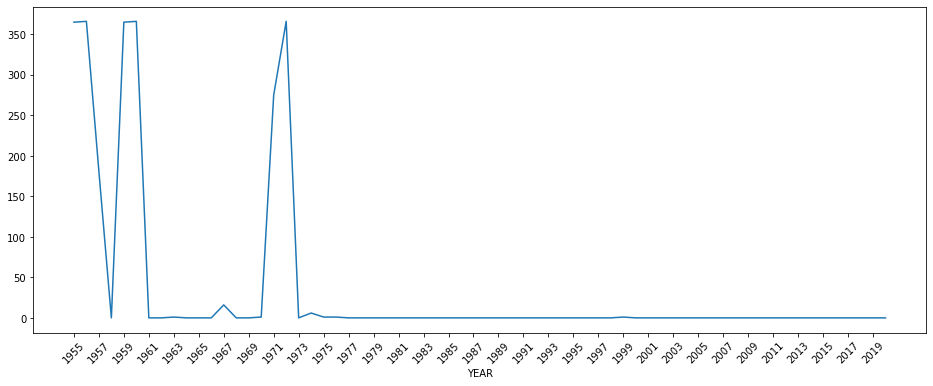

In [7]:
#visualise avg temperature nulls across years
fig2, ax = plt.subplots(figsize = (16,6))
fig2 = data.TAVG.isnull().groupby(data['YEAR']).sum().plot()
x = np.arange(data['YEAR'].min(),data['YEAR'].max(), 2)
plt.xticks(x, rotation = 45)
plt.show()

* As we gonna fill the missing values with (TMAX+TMIN)/2, we should examine that we don't have raws with TAVG NA and also NAs one of TMIN or TMAX. 
* From the below results we can see that there is only one case with TAVG as NA and also missing TMIN, so we can proceed with this method.

In [8]:
missing_tmax = data[data.TAVG.isna() & data.TMAX.isna()]
missing_tmin = data[data.TAVG.isna() & data.TMIN.isna()]
print(len(missing_tmax.index))
print(len(missing_tmin.index))

0
1


In [9]:
#filling NAs with min+max/2
data['TAVG'].fillna((data['TMAX']+data['TMIN'])/2, inplace = True)
data[data.TAVG.isna()]

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH
798,1957-03-09,0.3,NaN,16.9,NaN,1957,3


* During the data cleaning process, we should also check if there aren't any missing rows across years. This is not the case for our dataset, as we can see from the below table that there are fewer days than expected in some years.
* To overcome this issue, we should try to fil the gaps with data from another dataset.

In [10]:
missing_rows = data.groupby(['YEAR'])[['DATE']].count()
missing_rows[missing_rows['DATE']<365]

,DATE
YEAR,
2006,363
2007,364
2012,160
2013,10
2014,98
2017,342
2018,364


In [11]:
data2 = pd.read_csv("https://data.hellenicdataservice.gr/dataset/d3b0d446-aaba-49a8-acce-e7c6f6f5d3b5/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748/download/athens.csv", sep=',', header=None, usecols=[0,1,2,3,10])
data2.rename(columns = {0:'DATE_2', 1:'TAVG_2', 2:'TMAX_2',3:'TMIN_2',10:'PRCP_2'}, inplace = True)
data2

,DATE_2,TAVG_2,TMAX_2,TMIN_2,PRCP_2
0,2010-01-01,17.9,18.1,17.8,0.2
1,2010-01-02,15.6,15.7,15.5,0.0
2,2010-01-03,13.5,13.6,13.4,0.0
3,2010-01-04,9.5,9.6,9.5,0.0
4,2010-01-05,13.4,13.5,13.4,0.0
...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,0.0
3648,2019-12-28,8.3,8.4,8.2,7.2
3649,2019-12-29,6.4,6.5,6.4,3.4
3650,2019-12-30,4.0,4.0,3.9,12.4


In [12]:
#fixing data types
data2['DATE_2']=data2['DATE_2'].astype('datetime64[ns]')
data2['TAVG_2']=pd.to_numeric(data2['TAVG_2'], errors='coerce')
data2['TMAX_2']=pd.to_numeric(data2['TMAX_2'], errors='coerce')
data2['TMIN_2']=pd.to_numeric(data2['TMIN_2'], errors='coerce')
data2['YEAR_2']=pd.DatetimeIndex(data2['DATE_2']).year
data2['MONTH_2']=pd.DatetimeIndex(data2['DATE_2']).month
data2.dtypes

DATE_2     datetime64[ns]
TAVG_2            float64
TMAX_2            float64
TMIN_2            float64
PRCP_2            float64
YEAR_2              int64
MONTH_2             int64
dtype: object

In [13]:
#missing values per metric
missing_prcp2 = data2['PRCP_2'].isna().sum()/len(data2)
missing_tavg2 = data2['TAVG_2'].isna().sum()/len(data2)
print(round(missing_prcp2,2)*100)
print(round(missing_tavg2,2)*100)

0.0
0.0


* We would join the 2 datasets on the date columns. The need is to keep the rows that are in the 2nd dataset and not in the 1st.
* By filtering the rows that have been merged "left only" we achieve our purpose and we create a dataframe with the missing rows, in order to append them to our initial dataset.

In [14]:
#missing rows from 2nd dataset
data_missing = data2.merge(data, left_on='DATE_2', right_on='DATE', how='left', indicator=True)
data_append = data_missing[data_missing['_merge']=='left_only'].drop(columns=['DATE','PRCP','TAVG','TMAX','TMIN','YEAR','MONTH','_merge'])
data_append.rename(columns = 
                   {'DATE_2':'DATE', 'TAVG_2':'TAVG', 'PRCP_2':'PRCP','YEAR_2':'YEAR',
                    'TMAX_2':'TMAX','TMIN_2':'TMIN','MONTH_2':'MONTH'}, inplace = True)
data_append

,DATE,TAVG,TMAX,TMIN,PRCP,YEAR,MONTH
876,2012-05-26,21.6,21.7,21.5,0.0,2012,5
877,2012-05-27,21.0,21.1,20.8,0.6,2012,5
878,2012-05-28,21.7,21.8,21.6,0.0,2012,5
881,2012-05-31,21.2,21.3,21.1,0.0,2012,5
882,2012-06-01,22.4,22.5,22.3,0.0,2012,6
...,...,...,...,...,...,...,...
2831,2017-10-02,18.7,18.8,18.6,0.0,2017,10
2837,2017-10-08,17.8,17.9,17.7,0.0,2017,10
2844,2017-10-15,20.4,20.5,20.3,0.0,2017,10
2856,2017-10-27,17.8,17.9,17.7,0.0,2017,10


In [15]:
#append missing data
data_full = pd.concat([data,data_append],axis=0,join="outer",ignore_index=True)
data_full.sort_values(by=['DATE'],axis=0, inplace=True, ignore_index=True)
data_full

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1
...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12


* Another issue is that we have to fill-in the missing values for the PRCP metric. In order to do that, we would join our initial dataset with the 2nd one and fill the Null values accordingly.

In [16]:
data_full1 = data_full.merge(data2, left_on='DATE', right_on='DATE_2', how='left', indicator=True)
data_full1

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,DATE_2,TAVG_2,TMAX_2,TMIN_2,PRCP_2,YEAR_2,MONTH_2,_merge
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [17]:
#missing nulls of PRCP
data_full1['PRCP'].fillna(data_full1['PRCP_2'], inplace = True)
data_full1[data_full1.PRCP.isna()]

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,DATE_2,TAVG_2,TMAX_2,TMIN_2,PRCP_2,YEAR_2,MONTH_2,_merge
1911,1960-03-26,NaN,12.05,15.9,8.2,1960,3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1974,1960-05-28,NaN,20.40,23.8,17.0,1960,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2093,1960-09-24,NaN,20.15,23.3,17.0,1960,9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2210,1961-01-19,NaN,2.20,3.1,0.8,1961,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2291,1961-04-10,NaN,19.50,23.5,15.0,1961,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24075,2020-12-03,NaN,13.90,17.0,NaN,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24079,2020-12-07,NaN,15.40,18.2,NaN,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24082,2020-12-10,NaN,14.60,NaN,NaN,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24084,2020-12-12,NaN,14.80,18.2,12.1,2020,12,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [18]:
data_cleaned = data_full1.drop(columns = ['TMAX_2','TMIN_2','DATE_2','TAVG_2','PRCP_2','YEAR_2','MONTH_2','_merge']).copy()
data_cleaned

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1
...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12


* We want to fill the null values of PRCP for the rows that weren't filled by the previous action. Our approach is to take the average RPCP per month (to repespect the seasonality factor) and fill the null values depending to the month that they belong.

In [19]:
data_gr = data_cleaned.groupby(['MONTH'])[['PRCP']].mean()
data_gr.reset_index(inplace=True)
data_gr

,MONTH,PRCP
0,1,1.595316
1,2,1.500602
2,3,1.353470
3,4,0.825965
4,5,0.455342
5,6,0.241586
6,7,0.191102
7,8,0.175896
8,9,0.461100
9,10,1.395661


In [20]:
data_cleaned1 = data_cleaned.merge(data_gr[['MONTH','PRCP']], left_on='MONTH', right_on='MONTH', how='left')
data_cleaned1['PRCP_x'].fillna(data_cleaned1['PRCP_y'], inplace=True)
data_cleaned1 = data_cleaned1.drop(columns = ['PRCP_y'])
data_cleaned1.rename(columns = {'PRCP_x': 'PRCP'}, inplace = True)
data_cleaned1

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1
...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12


In [21]:
data_cleaned1.dtypes

DATE     datetime64[ns]
PRCP            float64
TAVG            float64
TMAX            float64
TMIN            float64
YEAR              int64
MONTH             int64
dtype: object

## Q2: Deviation of Summer Temperatures

In [22]:
baseline_tmp = data_cleaned1[(data_cleaned1['DATE']>='1974-1-1') & (data_cleaned1['DATE']<= '1999-12-31')
                            & (data_cleaned1['MONTH']>=6) & (data_cleaned1['MONTH']<=8)].TAVG.mean()
baseline_tmp

26.230727424749144

In [23]:
final_df = data_cleaned1[(data_cleaned1['MONTH']>=6) & (data_cleaned1['MONTH']<=8)].groupby(['YEAR'])[["TAVG"]].mean().copy()
final_df['TAVG_VAR_BASELINE'] = final_df["TAVG"]-baseline_tmp
final_df['10YR_ROLLING'] = final_df['TAVG_VAR_BASELINE'].rolling(10).mean()
final_df.reset_index(inplace=True)
final_df

,YEAR,TAVG,TAVG_VAR_BASELINE,10YR_ROLLING
0,1955,25.951087,-0.279640,NaN
1,1956,27.143478,0.912751,NaN
2,1957,27.371739,1.141012,NaN
3,1958,27.081522,0.850794,NaN
4,1959,26.401087,0.170360,NaN
...,...,...,...,...
61,2016,28.154348,1.923620,1.955320
62,2017,28.088043,1.857316,1.937751
63,2018,27.436957,1.206229,1.864599
64,2019,28.034783,1.804055,1.929381


In [24]:
#creating a custom palette for the conditional formating of the chart
custom_palette = {}
i = 0
while i < len(final_df.YEAR):
    
    num = final_df[final_df.YEAR==final_df.YEAR[i]].TAVG_VAR_BASELINE.item()
    if num < 0:
        custom_palette[final_df.YEAR[i]] = 'mediumblue'
    else:
        custom_palette[final_df.YEAR[i]] = 'orange'
    i = i + 1

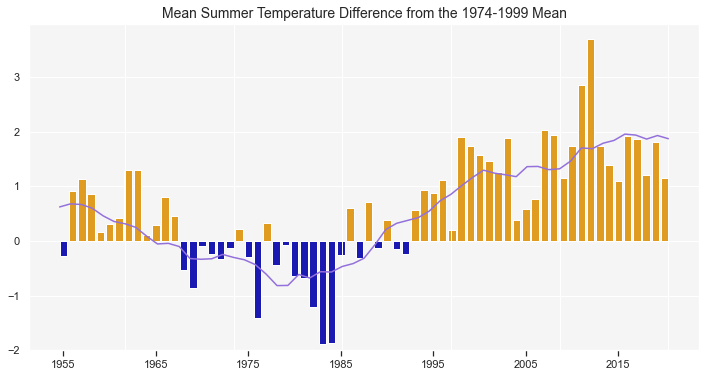

In [25]:
import matplotlib.ticker as ticker

sns.set_theme()
sns.set_palette("bright")
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x='YEAR', y='TAVG_VAR_BASELINE', data = final_df, palette = custom_palette)
ax.set_title('Mean Summer Temperature Difference from the 1974-1999 Mean', fontsize=14)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(ylim=(-2, None))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

ax2 = ax.twiny()
ax2 = sns.lineplot(x='YEAR', y='10YR_ROLLING', data = final_df, sort=False, color='mediumpurple')
ax2.set(xticklabels=[])
ax2.set(xlabel=None)
ax2.tick_params(top=False)

ax.relim()
ax.autoscale_view()
ax.margins(y=0.01)

### Inerpretation of the chart
* Almost all years between 1966 and 1985, the temperatures were consistenly lower than the baseline. 
* From 1993 and onwards there is a clear trend with signaficantly higher temperatures than our baseline, with peak years 2011 and 2012.
* From the rolling 10 year baseline we can see a continuous increase in the mean temperature from the baseline, beginning from the 1993.

## Q3: Evolution of Daily Temperatures

In [26]:
df_Q3 = data_cleaned1.copy()
df_Q3['30D_ROLLING'] = df_Q3['TAVG'].rolling(30).mean()
df_Q3['DAY_OF_YEAR'] = pd.DatetimeIndex(df_Q3['DATE']).dayofyear
df_Q3

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,30D_ROLLING,DAY_OF_YEAR
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1,NaN,1
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1,NaN,2
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1,NaN,3
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1,NaN,4
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1,NaN,5
...,...,...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12,14.086667,362
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12,14.153333,363
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12,14.153333,364
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12,14.193333,365


In [27]:
#average daily temperature for the baseline period of 1974-1999 
df_Q3_1 = df_Q3[(df_Q3['DATE']>='1974-1-1') & (df_Q3['DATE']<= '1999-12-31')].copy()
baseline_daily_avg = df_Q3_1.groupby(['DAY_OF_YEAR'])[['30D_ROLLING']].mean()
baseline_daily_avg

,30D_ROLLING
DAY_OF_YEAR,
1,11.268205
2,11.223205
3,11.163205
4,11.073205
5,10.987051
...,...
362,11.560385
363,11.481923
364,11.433590


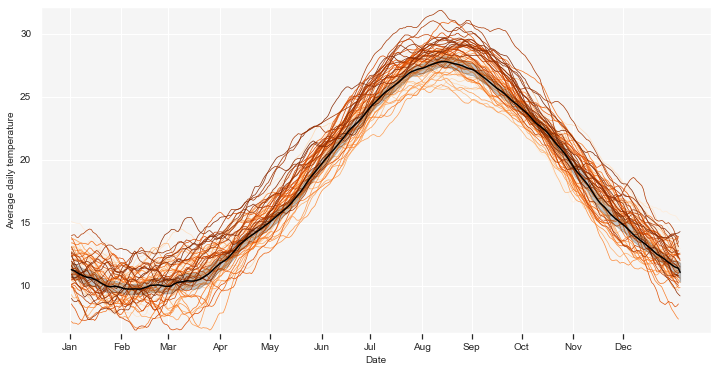

In [28]:
import matplotlib.ticker as ticker

#sns.set_theme()
sns.set_palette("dark")
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_ylabel('Average daily temperature', fontsize=10)
ax1.set_xlabel('Date', fontsize=10)
ax1 = sns.lineplot(x=df_Q3['DAY_OF_YEAR'], y='30D_ROLLING', data = df_Q3, hue='YEAR', sort=False, 
                   linewidth = 0.7, palette = 'Oranges', legend = False)
#ax1.set(ylim=(5,35))
plt.xticks([0,31,59,90,120,151,180,211,241,271,302,332],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(b=True, which='major', color='white', linestyle='-')
ax1.tick_params(axis='both', which='major', labelsize=10)

ax2 = ax1.twiny()
ax2 = sns.lineplot(x=df_Q3_1['DAY_OF_YEAR'], y='30D_ROLLING', data = df_Q3_1, sort=False, color='black')
ax2.set(xticklabels=[])
ax2.set(xlabel=None)
ax2.tick_params(top=False)
ax2.grid(False)

ax1.relim()
ax1.autoscale_view()
ax1.margins(y=0.01)

### Interpretation of the chart
* The more volatility for average temperature is noticed in the January-April period across years. The trend for the latest years is sligtly warmer for these months.
* Also there is a lot of variance in the July-September period.
* In the latest years, from 2010 and ownards ,we notice higher temperatures on average across seasons.

## Q4: Extreme Temperature Events

In [29]:
df_Q4 = data_cleaned1.copy()
df_Q4

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1
...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12


In [30]:
#calculating baseline for the respected years
df_Q4 = df_Q4[(df_Q4['DATE']>='1974-1-1') & (df_Q4['DATE']<= '1999-12-31')].copy()
df_Q4['DAY_OF_YEAR'] = pd.DatetimeIndex(df_Q4['DATE']).dayofyear
baseline_tmp2 = df_Q4.groupby(['DAY_OF_YEAR'])[['TAVG']].mean()
baseline_tmp2

,TAVG
DAY_OF_YEAR,
1,10.365385
2,10.707692
3,10.207692
4,9.634615
5,9.919231
...,...
362,10.261538
363,10.653846
364,11.011538


In [31]:
#mark the days that are above the threshold
pct = 1.1
baseline_tmp2['THRESHOLD'] = baseline_tmp2['TAVG'] * pct
baseline_tmp2
df_Q4_1 = data_cleaned1.copy()
df_Q4_1['DAY_OF_YEAR'] = pd.DatetimeIndex(df_Q4_1['DATE']).dayofyear
df_Q4_1 = df_Q4_1.merge(baseline_tmp2['THRESHOLD'], left_on='DAY_OF_YEAR', right_on=baseline_tmp2.index, how='left' )
df_Q4_1['EXTREME_TEMP'] = df_Q4_1['TAVG']>=df_Q4_1['THRESHOLD']
df_Q4_1

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,DAY_OF_YEAR,THRESHOLD,EXTREME_TEMP
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1,1,11.401923,True
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1,2,11.778462,False
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1,3,11.228462,True
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1,4,10.598077,True
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1,5,10.911154,True
...,...,...,...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12,362,11.287692,True
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12,363,11.719231,True
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12,364,12.112692,True
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12,365,12.260769,True


In [32]:
#counting days above threshold and dividing by days of years
df_Q4_2 = df_Q4_1.groupby(['YEAR'])[['DATE']].count()
df_Q4_2['EXTREME_TEMP'] = df_Q4_1[df_Q4_1['EXTREME_TEMP']==True].groupby(['YEAR'])[['EXTREME_TEMP']].count()
df_Q4_2['PCT_OF_EXTREME'] = df_Q4_2['EXTREME_TEMP']/df_Q4_2['DATE']
df_Q4_2.reset_index(inplace=True)
df_Q4_2

,YEAR,DATE,EXTREME_TEMP,PCT_OF_EXTREME
0,1955,365,129,0.353425
1,1956,366,119,0.325137
2,1957,365,115,0.315068
3,1958,365,134,0.367123
4,1959,365,95,0.260274
...,...,...,...,...
61,2016,366,158,0.431694
62,2017,365,169,0.463014
63,2018,365,168,0.460274
64,2019,365,159,0.435616


In [33]:
#finding the average of the extreme temperatures baseline
baseline_pct = df_Q4_2[(df_Q4_2['YEAR']>=1974) & (df_Q4_2['YEAR']<=1999)].PCT_OF_EXTREME.mean()
baseline_pct

0.24823915884998302

In [34]:
#creating a custom palette for the conditional formating of the chart
custom_palette1 = {}
i = 0
while i < len(df_Q4_2.YEAR):
    
    num = df_Q4_2[df_Q4_2.YEAR==df_Q4_2.YEAR[i]].PCT_OF_EXTREME.item()
    if num < baseline_pct:
        custom_palette1[df_Q4_2.YEAR[i]] = 'mediumblue'
    else:
        custom_palette1[df_Q4_2.YEAR[i]] = 'orange'
    i = i + 1

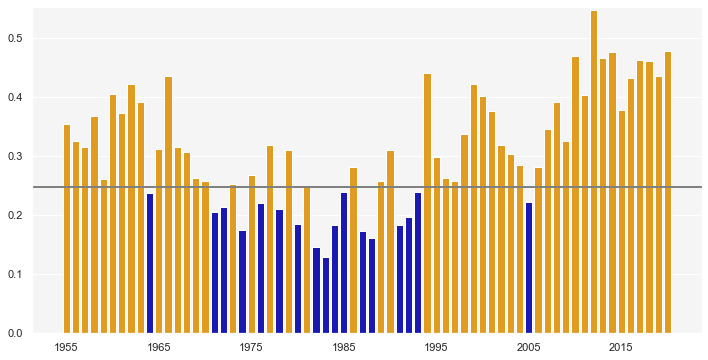

In [35]:
sns.set_theme()
sns.set_palette("bright")
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x='YEAR', y='PCT_OF_EXTREME', data = df_Q4_2, palette = custom_palette1)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

ax.axhline(baseline_pct, ls='-', linewidth=2, c = 'grey')

ax.relim()
ax.autoscale_view()
ax.margins(y=0.01)

### Interpretation of the chart
* From 1995, the years with a percentage of days with extreme temperatures higher than the baseline is the status quo (except 2005).
* From 2012 and onwards, not only there is streak of every year having a percentage of extreme temperatures higher than the baseline, but we also obsvere the highest percentages ever for the period we investigate.

## Q5: Precipitation

In [36]:
df_Q5 = data_cleaned1.copy()
df_Q5

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH
0,1955-01-01,0.0,14.35,18.5,10.2,1955,1
1,1955-01-02,2.0,10.70,14.4,7.0,1955,1
2,1955-01-03,0.0,12.70,15.8,9.6,1955,1
3,1955-01-04,0.0,13.05,18.8,7.3,1955,1
4,1955-01-05,0.0,13.15,17.9,8.4,1955,1
...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.60,NaN,NaN,2020,12
24100,2020-12-28,6.6,14.80,18.2,11.9,2020,12
24101,2020-12-29,0.0,16.30,19.9,12.5,2020,12
24102,2020-12-30,0.0,16.40,19.9,14.8,2020,12


In [37]:
#calculating rainfall ratio
df_Q5_1 = df_Q5.groupby(['YEAR'])[['PRCP']].sum()
df_Q5_1['RAINING_DAYS'] = df_Q5[df_Q5['PRCP']>0].groupby(['YEAR'])[['DATE']].count()
df_Q5_1['RAINFALL_RATIO'] = df_Q5_1['PRCP']/df_Q5_1['RAINING_DAYS']
df_Q5_1

,PRCP,RAINING_DAYS,RAINFALL_RATIO
YEAR,,,
1955,547.00000,68,8.044118
1956,281.30000,52,5.409615
1957,303.20000,73,4.153425
1958,350.00000,68,5.147059
1959,214.00000,62,3.451613
...,...,...,...
2016,261.60000,42,6.228571
2017,304.30000,48,6.339583
2018,380.20000,55,6.912727


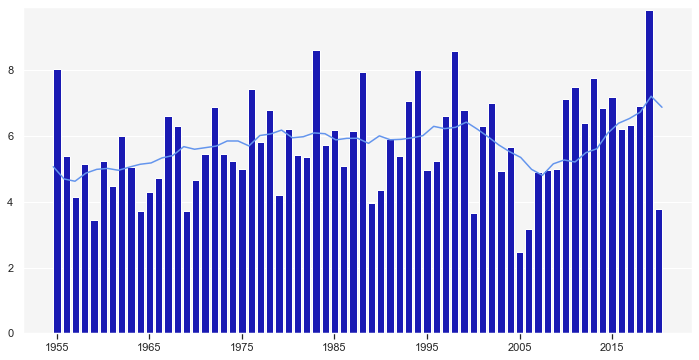

In [38]:
sns.set_theme()
sns.set_palette("dark")
sns.set(rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

fig, ax1 = plt.subplots(figsize=(12,6))

ax1 = sns.barplot(x=df_Q5_1.index, y='RAINFALL_RATIO', data = df_Q5_1, color = 'mediumblue')
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

ax2 = ax1.twiny()
ax2 = sns.lineplot(x=df_Q5_1.index, y=df_Q5_1['RAINFALL_RATIO'].rolling(10).mean(), data = df_Q5_1, sort=False, color='cornflowerblue')
ax2.set(xticklabels=[])
ax2.set(xlabel=None)
ax2.tick_params(top=False)
ax2.grid(False)

ax1.relim()
ax1.autoscale_view()
ax1.margins(y=0.01)

### Interpretation of the chart
* The trend of the rainfall ratio was steadily and slowly increasing year over year until 1997 and after that there were a decline.
* From 2009 and onwards we notice again an upward trend showing that in general we are getting rain in more concetrated bursts.